Full Name:Lê Minh Nhật

Student ID:20520115 

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = '20520115'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

In [71]:
# Code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [72]:
# Load the fish dataset
df = pd.read_csv('fish.csv')
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [73]:
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']].values
y = df['Weight'].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20520115)

In [75]:
class LinearRegression_GD:
  def __init__(self, eta=0.001, max_iter=200, random_state=20520115) :
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = []

  def predict(self, X): 
    return np.dot(X, self.w[1:]) + self.w[0]

  def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
      self.costs = [ ]
      for n_iters in range(self.max_iter): 
        y_pred = self.predict(X)
        diff = y - y_pred
        self.w[0] += self.eta * np.sum(diff)
        for j in range(X.shape[1]): 
          delta = 0.0
          for i in range(X.shape[0]): 
            delta += self.eta * diff[i] * X[i][j]
          self.w[j + 1] += delta
        cost = np.sum(diff ** 2) / 2
        self.costs.append(cost)

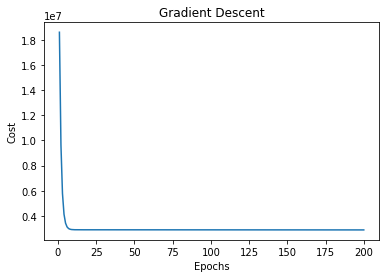

In [76]:
#Gradient Descent
reg_GD =  LinearRegression_GD(eta=0.000001, max_iter=200,random_state =20520115)
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [77]:
reg_SGD = SGDRegressor (eta0=0.0001, max_iter=200, random_state=20520115, learning_rate= 'constant')
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=20520115)

In [78]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()
# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

In [79]:
#Algorithms Comparisons
w_GD = reg_GD.w
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print(w_GD)
print(w_SGD)
print(w_NE)

[-1.26847322  5.25342809  5.50095758  5.49437538  1.78928739  0.88819993]
[-7.13020323  4.67120609  4.23590568  1.88777468  0.86838351  0.73619719]
[-551.44265599   38.78603516   10.51654757  -21.56054757   23.78402103
   22.27861965]


In [80]:
y_pred_GD = reg_GD.predict(X_test)

In [81]:
y_pred_SGD = reg_SGD.predict(X_test)

In [82]:
y_pred_NE = reg_NE.predict(X_test)

In [83]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 179.09961
MAE of SGD: 143.555599
MAE of NE: 90.24887


In [84]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 179.09961
MAE of SGD: 143.555599
MAE of NE: 90.24887


In [85]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 39090.112879
MSE of SGD: 33866.10616
MSE of NE: 14642.363283


In [86]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.452836
R2 of SGD: 0.525959
R2 of NE: 0.795043


# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [87]:
# Code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [88]:
# Load the insurance dataset
dt = pd.read_csv('insurance.csv')
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [89]:
# Convert categorical variables to numeric using one-hot encoding
dt = pd.get_dummies(dt, columns=['sex', 'smoker', 'region'], drop_first=True)
dt

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [90]:
X = dt.drop(columns=['charges']).values
y = dt['charges'].values

In [91]:
class LinearRegression_GD:
  def __init__(self, eta=0.0000001, max_iter=20, random_state=20520115) :
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = [] 

  def predict(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]

  def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) 
      self.costs = [ ]
      for n_iters in range(self.max_iter): 
        y_pred = self.predict(X)
        diff = y - y_pred
        self.w[0] += self.eta * np.sum(diff)
        for j in range(X.shape[1]): 
          delta = 0.0
          for i in range(X.shape[0]): 
            delta += self.eta * diff[i] * X[i][j]
          self.w[j + 1] += delta
        cost = np.sum(diff ** 2) / 2
        self.costs.append(cost)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20520115)

In [93]:
X_train

array([[54.   , 31.9  ,  3.   , ...,  0.   ,  1.   ,  0.   ],
       [19.   , 24.51 ,  1.   , ...,  1.   ,  0.   ,  0.   ],
       [21.   , 21.85 ,  1.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [26.   , 34.2  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       [44.   , 23.98 ,  2.   , ...,  0.   ,  1.   ,  0.   ],
       [58.   , 32.965,  0.   , ...,  0.   ,  0.   ,  0.   ]])

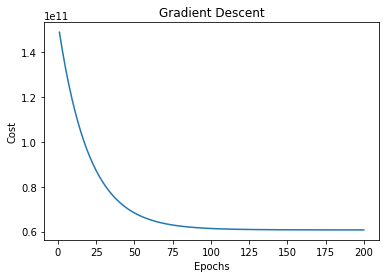

In [94]:
# Initalize the GD model
reg_GD = LinearRegression_GD(eta=1e-8, max_iter=200, random_state=20520115)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [95]:
reg_SGD = SGDRegressor (eta0=0.0001, max_iter=200, random_state=20520115, learning_rate= 'constant')
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=20520115)

In [96]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()
# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

In [97]:
#Algorithms Comparisons
w_GD = reg_GD.w
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print(w_GD)
print(w_SGD)
print(w_NE)

[  4.76049937 210.40551274 160.80549465   6.12096193   2.93251489
   8.14323939   0.83610201   1.74396198   0.79403276]
[-1957.87671403   199.45284279   108.41933195   183.8442261
   -58.45859763 17690.12832527  -688.69532957  -176.12950539
  -982.45577856]
[-11533.02741749    257.6705034     325.99288115    355.76917874
   -150.35941512  24060.32258474   -301.40212443  -1095.12176952
   -913.18871731]


In [98]:
y_pred_GD = reg_GD.predict(X_test)

In [99]:
y_pred_SGD = reg_SGD.predict(X_test)

In [100]:
y_pred_NE = reg_NE.predict(X_test)

In [101]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 9075.534975
MAE of SGD: 4590.617413
MAE of NE: 4204.288472


In [102]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 9075.534975
MAE of SGD: 4590.617413
MAE of NE: 4204.288472


In [103]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 132729795.782561
MSE of SGD: 47754747.552288
MSE of NE: 38191189.42878


In [104]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.129243
R2 of SGD: 0.686711
R2 of NE: 0.749452


# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [105]:
# Code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler

In [106]:
# Load the tesla_stock dataset
df = pd.read_csv('tesla_stock.csv')
df.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


<Axes: >

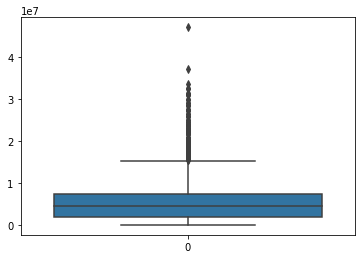

In [107]:
sns.boxplot(df['Volume'])

In [108]:
Q1=df['Volume'].quantile(0.25)
Q3=df['Volume'].quantile(0.75)

In [109]:
IQR=Q3-Q1 
IQR

5461875.0

In [110]:
low_fence=Q1-(1.5*IQR)
up_fence=Q3+(1.5*IQR)
print(low_fence)
print(up_fence)

-6293537.5
15553962.5


In [111]:
df=df[~((df['Volume']<low_fence)|(df['Volume']>up_fence))]
df.reset_index(drop=True,inplace=True)

<Axes: >

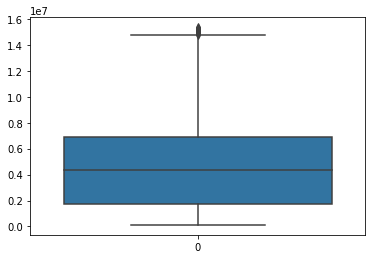

In [112]:
sns.boxplot(df['Volume'])

In [113]:
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close'].values

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20520115)

In [115]:
class LinearRegression_GD:
  def __init__(self, eta=0.001, max_iter=20, random_state=20520115):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = []

  def predict(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]

  def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
      self.costs = [ ]
      for n_iters in range(self.max_iter): 
        y_pred = self.predict(X)
        diff = y - y_pred
        self.w[0] += self.eta * np.sum(diff)
        for j in range(X.shape[1]): 
          delta = 0.0
          for i in range(X.shape[0]): 
            delta += self.eta * diff[i] * X[i][j]
          self.w[j + 1] += delta
        cost = np.sum(diff ** 2) / 2
        self.costs.append(cost)


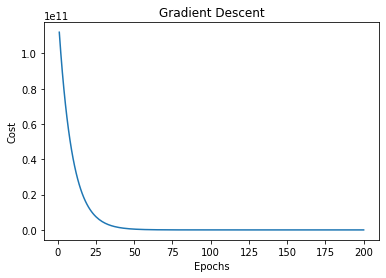

In [116]:
#Gradient Descent
reg_GD =  LinearRegression_GD(eta=1e-18, max_iter=200,random_state =20520115)
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [117]:
reg_SGD = SGDRegressor (eta0=0.0001, max_iter=200, random_state=20520115, learning_rate= 'constant')
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=20520115)

In [118]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()
# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

In [119]:
#Algorithms Comparisons
w_GD = reg_GD.w
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print(w_GD)
print(w_SGD)
print(w_NE)

[-1.85441994e-03  1.07385938e-02  9.73684470e-03  1.97169784e-03
  3.12643507e-05]
[-1.26009541e+10 -1.64291969e+12 -1.64012438e+12 -1.56092935e+12
 -3.24641579e+13]
[-3.59713618e-02 -6.29659257e-01  8.23904566e-01  8.05568808e-01
  2.99578019e-08]


In [120]:
y_pred_GD = reg_GD.predict(X_test)

In [121]:
y_pred_SGD = reg_SGD.predict(X_test)

In [122]:
y_pred_NE = reg_NE.predict(X_test)

In [123]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 77.493799
MAE of NE: 1.340307


In [124]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 77.493799
MAE of NE: 1.340307


In [125]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 10465.29006
MSE of NE: 3.947968


In [126]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.238118
R2 of NE: 0.999713
